In [49]:
import matplotlib.pyplot as plt

import numpy as np

from sklearn.datasets import make_blobs
from sklearn.decomposition import PCA

from keras.layers import Dense
from keras import Input, Model

In [40]:
# Make 3 blobs with 50 features
X,y= make_blobs(n_features=20, centers=3, n_samples=3000, cluster_std=0.2, center_box=[-1, 1], random_state=9)
X.shape, y.shape

((3000, 20), (3000,))

In [51]:
pca = PCA(n_components=2).fit_transform(X)
pca.shape

(3000, 2)

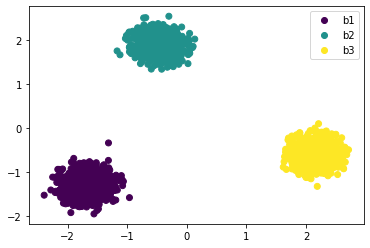

In [56]:
scatter = plt.scatter(pca[:, 0], pca[:, 1], c=y)
plt.legend(handles=scatter.legend_elements()[0], labels=['b1', 'b2', 'b3'])
plt.show()

In [41]:
X_b1 = X[np.where(y == 0)]
X_b2 = X[np.where(y == 1)]
X_b3 = X[np.where(y == 2)]
X_b1.shape, X_b2.shape, X_b3.shape

((1000, 20), (1000, 20), (1000, 20))

In [42]:
# Latent space dimension
encoding_dim = 2

# Input layer: 50 features
input = Input(shape=(20,))

# Encoded representation of input
encoded = Dense(encoding_dim, activation='sigmoid')(input)

# Decoded representation of latent space 
decoded = Dense(20, activation='tanh')(encoded)

# Autoencoder model with encoder and decoder segments
autoencoder = Model(input, decoded)

In [43]:
autoencoder.compile(optimizer='adam', loss='mse')

In [44]:
# Train on input data
autoencoder.fit(X_b1, X_b1, epochs=60)

Epoch 1/60
32/32 [==============================] - 1s 3ms/step - loss: 0.3641
Epoch 2/60
32/32 [==============================] - 0s 3ms/step - loss: 0.3065
Epoch 3/60
32/32 [==============================] - 0s 3ms/step - loss: 0.2589
Epoch 4/60
32/32 [==============================] - 0s 5ms/step - loss: 0.2181
Epoch 5/60
32/32 [==============================] - 0s 3ms/step - loss: 0.1825
Epoch 6/60
32/32 [==============================] - 0s 2ms/step - loss: 0.1519
Epoch 7/60
32/32 [==============================] - 0s 3ms/step - loss: 0.1266
Epoch 8/60
32/32 [==============================] - 0s 3ms/step - loss: 0.1066
Epoch 9/60
32/32 [==============================] - 0s 3ms/step - loss: 0.0913
Epoch 10/60
32/32 [==============================] - 0s 3ms/step - loss: 0.0798
Epoch 11/60
32/32 [==============================] - 0s 3ms/step - loss: 0.0712
Epoch 12/60
32/32 [==============================] - 0s 3ms/step - loss: 0.0647
Epoch 13/60
32/32 [==============================

In [45]:
# Map raw input to latent space
latent_b1 = autoencoder.predict(X_b1)
latent_b2 = autoencoder.predict(X_b2)
latent_b3 = autoencoder.predict(X_b3)
latent_b1.shape, latent_b2.shape, latent_b3.shape

((1000, 20), (1000, 20), (1000, 20))

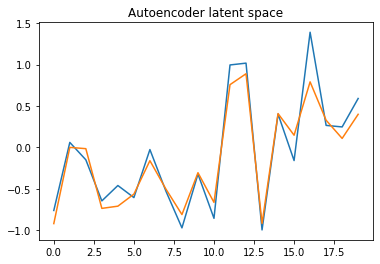

In [46]:
plt.plot(X_b1[1, :])
plt.plot(latent_b1[0, :])
plt.title('Autoencoder latent space')
plt.show()

In [47]:
b1_error = []
b2_error = []
b3_error = []

for x in latent_b1:
    b1_error.append(np.power(X_b1[0, :] - x, 2).mean())
    
for x in latent_b2:
    b2_error.append(np.power(X_b1[0, :] - x, 2).mean())
    
for x in latent_b3:
    b3_error.append(np.power(X_b1[0, :] - x, 2).mean())

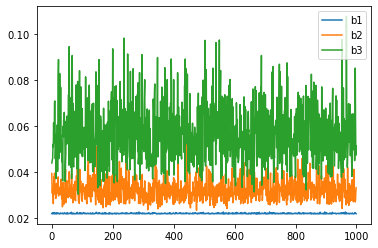

In [48]:
plt.plot(b1_error, label='b1')
plt.plot(b2_error, label='b2')
plt.plot(b3_error, label='b3')
plt.legend(loc='upper right')
plt.show()

## Deep Autoencoder

In [57]:
# Latent space dimension
deep_encoding_dim = 2

# Input layer: 50 features
deep_input = Input(shape=(X_b1.shape[1],))

deep_encoded = Dense(10, activation='sigmoid')(deep_input)

deep_encoded = Dense(5, activation='sigmoid')(deep_encoded)

# Encoded representation of input
deep_encoded = Dense(deep_encoding_dim, activation='sigmoid')(deep_encoded)

deep_decoded = Dense(5, activation='tanh')(deep_encoded)

deep_decoded = Dense(10, activation='tanh')(deep_decoded)

# Decoded representation of latent space 
deep_decoded = Dense(X_b1.shape[1], activation='tanh')(deep_decoded)

In [58]:
# Autoencoder model with encoder and decoder segments
deepautoencoder = Model(deep_input, deep_decoded)
# Separating encoder model from autoencoder
deepencoder = Model(deep_input, deep_encoded)

deepautoencoder.compile(optimizer='adam', loss='mse')

In [59]:
# Train on input data
deepautoencoder.fit(X_b1, X_b1, epochs=60)

Epoch 1/60
32/32 [==============================] - 1s 2ms/step - loss: 0.3459
Epoch 2/60
32/32 [==============================] - 0s 3ms/step - loss: 0.2403
Epoch 3/60
32/32 [==============================] - 0s 3ms/step - loss: 0.1440
Epoch 4/60
32/32 [==============================] - 0s 3ms/step - loss: 0.0820
Epoch 5/60
32/32 [==============================] - 0s 5ms/step - loss: 0.0541
Epoch 6/60
32/32 [==============================] - 0s 3ms/step - loss: 0.0450
Epoch 7/60
32/32 [==============================] - 0s 3ms/step - loss: 0.0423
Epoch 8/60
32/32 [==============================] - 0s 4ms/step - loss: 0.0413
Epoch 9/60
32/32 [==============================] - 0s 3ms/step - loss: 0.0408
Epoch 10/60
32/32 [==============================] - 0s 3ms/step - loss: 0.0406
Epoch 11/60
32/32 [==============================] - 0s 3ms/step - loss: 0.0404
Epoch 12/60
32/32 [==============================] - 0s 3ms/step - loss: 0.0403
Epoch 13/60
32/32 [==============================

In [60]:
# Map raw input to latent space
latent_b1 = deepautoencoder.predict(X_b1)
latent_b2 = deepautoencoder.predict(X_b2)
latent_b3 = deepautoencoder.predict(X_b3)
latent_b1.shape, latent_b2.shape, latent_b3.shape

((1000, 20), (1000, 20), (1000, 20))

In [61]:
b1_error = []
b2_error = []
b3_error = []

for x in latent_b1:
    b1_error.append(np.power(X_b1[0, :] - x, 2).mean())
    
for x in latent_b2:
    b2_error.append(np.power(X_b1[0, :] - x, 2).mean())
    
for x in latent_b3:
    b3_error.append(np.power(X_b1[0, :] - x, 2).mean())

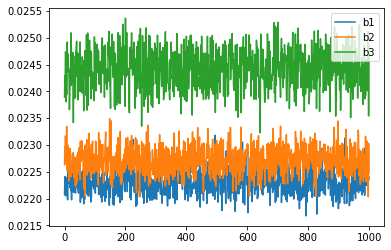

In [62]:
plt.plot(b1_error, label='b1')
plt.plot(b2_error, label='b2')
plt.plot(b3_error, label='b3')
plt.legend(loc='upper right')
plt.show()